# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_by_city = pyber_data_df.groupby('type').count().ride_id
rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_by_city_type = city_data_df.groupby('type').sum().driver_count
drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby('type').sum().fare
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_city_type = pyber_data_df.groupby('type').mean().fare
avg_fare_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare_by_city_type = pyber_data_df.groupby('type').sum().fare / drivers_by_city_type
avg_driver_fare_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
            {'Total Rides':rides_by_city,
             'Total Drivers':drivers_by_city_type,
             'Total Fares':fares_by_city_type,
             'Average Fare per Ride':avg_fare_by_city_type,
             'Average Fare per Driver':avg_driver_fare_by_city_type}
            )
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [36]:
# 1. Read the merged DataFrame
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [37]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fares_type_date=pyber_data_df.groupby(["city","type","date"]).sum([["fares"]])
fares_type_date

fare       ride_id  driver_count
city         type  date                                              
Amandaburgh  Urban 1/11/2019 2:22   29.24  7.279900e+12            12
                   1/13/2019 16:04  23.35  9.975080e+12            12
                   1/2/2019 9:57    33.06  6.330660e+12            12
                   1/21/2019 4:12    9.26  5.528430e+12            12
                   1/29/2019 23:28  41.06  4.296860e+12            12
...                                   ...           ...           ...
Williamsview Urban 4/18/2019 2:07   39.79  8.745530e+12            46
                   4/26/2019 0:30   20.89  2.565030e+12            46
                   4/7/2019 0:32    18.92  2.394894e+10            46
                   4/7/2019 2:32    19.19  8.047770e+12            46
                   5/4/2019 14:56   32.80  2.677730e+12            46

[2375 rows x 3 columns]

In [38]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fares_type_date=pyber_data_df.groupby(["city","type","date"]).sum([["fares"]])
fares_type_datetotal_fare_per_day=total_fare_per_day.reset_index()
total_fare_per_day.head(10)

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [56]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_pivot_table = pd.pivot_table(fares_type_date, index = "date", columns = "type", values = "fare")
date_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [57]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.


date_range_pivot_table_df = date_pivot_table.loc["1/1/2019":"4/29/2019"]

date_range_pivot_table_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [58]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_range_pivot_table_df.index=pd.to_datetime(date_range_pivot_table_df.index) 
date_range_pivot_table_df.index


DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-04-28 17:38:00', '2019-04-28 19:35:00',
               '2019-04-28 02:38:00', '2019-04-28 04:00:00',
               '2019-04-28 04:21:00', '2019-04-28 04:34:00',
               '2019-04-28 08:15:00', '2019-04-28 09:03:00',
               '2019-04-28 09:10:00', '2019-04-28 09:25:00'],
              dtype='datetime64[ns]', name='date', length=2057, freq=None)

In [59]:
# 7. Check that the datatype for the index is datetime using df.info()

date_range_pivot_table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [71]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

week_pivot_table_df=date_range_pivot_table_df.resample("W").sum()

##week_pivot_table.head()
week_pivot_table_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


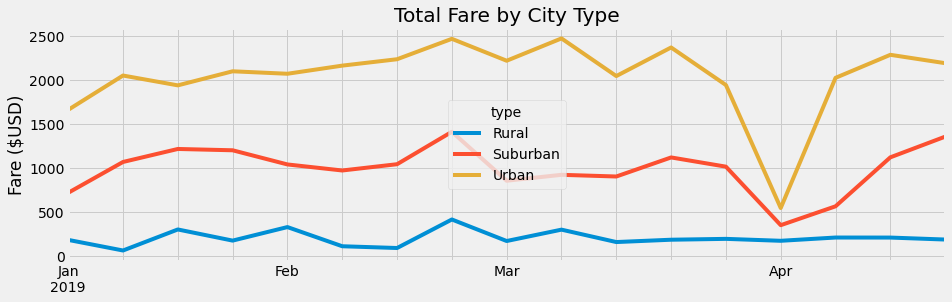

In [76]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

from matplotlib.legend import Legend
import numpy as np

ax = week_pivot_table_df.plot(xticks=week_pivot_table_df.index, figsize=(14,4))

# Set the x and y label
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)


# Create a title. 
ax.set_title("Total Fare by City Type")
plt.legend(loc='center', title='type')

# Save Figure

plt.savefig("Resources/Pyber_Fare_Summary.png")
# Show Figure
plt.show()

